 **Artificial Neural Network to predict house prices**

In [3]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv('housepricedata.csv')


In [5]:
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [6]:
#convert dataset to Array to process
dataset = df.values

In [7]:
#to print what inside dataset
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [8]:
#split dataset into input feature(x) and feature to predict (y)
X = dataset[:,0:10]
Y = dataset[:,10]

In [9]:
#preprocessng for dataset
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
#split dataset into 30% test , 70% training 
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)


In [12]:
#split into testset and validation set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [14]:
#define the strusture of ANN
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [15]:
#configuring the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
#fitting the prameter 
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 12ms/step - loss: 0.6968 - accuracy: 0.3796 - val_loss: 0.6936 - val_accuracy: 0.4749
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.4481 - val_loss: 0.6911 - val_accuracy: 0.5251
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.4990 - val_loss: 0.6888 - val_accuracy: 0.5571
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.5147 - val_loss: 0.6866 - val_accuracy: 0.5936
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6878 - accuracy: 0.5626 - val_loss: 0.6844 - val_accuracy: 0.6073
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6858 - accuracy: 0.5969 - val_loss: 0.6822 - val_accuracy: 0.6667
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6836 - accuracy: 0.6800 - val_loss: 0.6798 - val_accuracy: 0.7078
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 0.8699 - val_loss: 0.3949 - val_accuracy: 0.8584
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.8718 - val_loss: 0.3900 - val_accuracy: 0.8584
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3795 - accuracy: 0.8728 - val_loss: 0.3859 - val_accuracy: 0.8584
Epoch 62/100
32/32 [==============================] - 0s 6ms/step - loss: 0.3742 - accuracy: 0.8738 - val_loss: 0.3810 - val_accuracy: 0.8584
Epoch 63/100
32/32 [==============================] - 0s 7ms/step - loss: 0.3694 - accuracy: 0.8757 - val_loss: 0.3776 - val_accuracy: 0.8584
Epoch 64/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3643 - accuracy: 0.8777 - val_loss: 0.3738 - val_accuracy: 0.8539
Epoch 65/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3599 - accuracy: 0.8787 - val_loss: 0.3696 - val_accuracy: 0.8584
Epoch 

In [17]:
model.evaluate(X_test, Y_test)[1]


7/7 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8721


0.8721461296081543

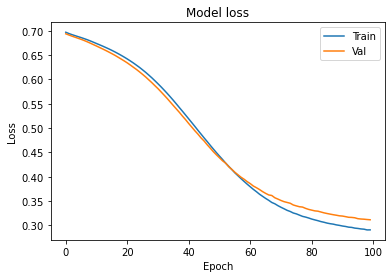

In [18]:
# visualizing training loss and validation loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
# plot our training accuracy and validation accuracy 
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

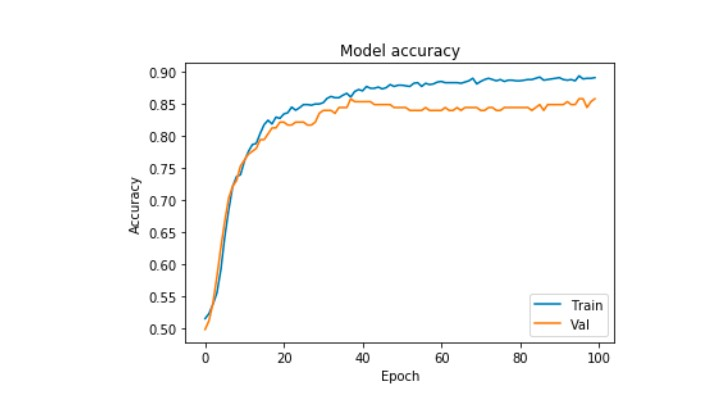